# House Prediction : XGboost Preformances

## Libraries import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import xgboost as xg

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:/Users/straw/Desktop/AIS2/House-Prediction/Data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Replace missing values

In [3]:
df.total_bedrooms.fillna(method='pad', inplace=True)

In [4]:
df.iloc[:,2:].describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.642151,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,420.876678,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Label encoding

In [5]:
label = LabelEncoder()

df['ocean_proximity'] = label.fit_transform(df['ocean_proximity'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [6]:
X = np.array(df.loc[:, ~df.columns.isin(['median_house_value'])])
X.shape

(20640, 9)

In [7]:
y = np.array(df["median_house_value"])
y.shape

(20640,)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.25, shuffle=True)

In [10]:
model = xg.XGBRegressor(n_estimators = 500)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [11]:
y_pred = model.predict(X_val)

In [12]:
mean_squared_error(y_val, y_pred)

2094018321.9680529

In [13]:
mean_absolute_error(y_val, y_pred)

30991.800256063772

In [14]:
r2_score(y_val, y_pred)

0.8435013468084884

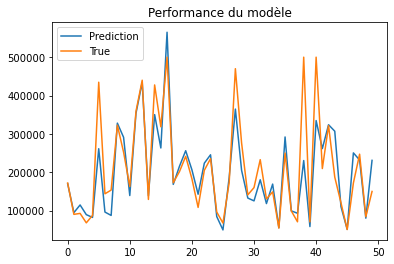

In [15]:
plt.title('Performance du modèle')
plt.plot(list(y_pred)[:50], label='Prediction')
plt.plot(list(y_val)[:50], label='True')
plt.legend()

In [16]:
#gsc = GridSearchCV(
#            estimator = xg.XGBRegressor(),
#            param_grid = {"max_depth": [3, 4, 5, 6, 8], "n_estimators": [500, 700, 900]},
#            cv=4, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [17]:
#gsc = GridSearchCV(
#            estimator=xg.XGBRegressor(),
#            param_grid={"learning_rate": (0.05, 0.10, 0.15),
#                        "max_depth": [3, 4, 5, 6, 8],
#                        "min_child_weight": [ 1, 3, 5, 7],
#                        "gamma":[ 0.0, 0.1, 0.2],
#                        "colsample_bytree":[ 0.3, 0.4],},
#            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [18]:
#gsc.fit(X_train, y_train)

In [19]:
#print(gsc.best_estimator_)

In [20]:
#y_pred = gsc.predict(X_val)

In [21]:
#mean_absolute_error(y_val, y_pred)

In [22]:
#r2_score(y_val, y_pred)